In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
df= pd.read_excel('/content/zomato.xlsx')
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [5]:
corpus=[]

for i in range(0,1000):
  rating= re.sub('[^a-zA-Z]',' ',df['Review'][i])
  rating= rating.lower()
  rating= rating.split()
  lemmatizer= WordNetLemmatizer()
  all_stopwords= stopwords.words('english')
  all_stopwords.remove('not')
  rating= [lemmatizer.lemmatize(word) for word in rating if not word in set(all_stopwords)]
  rating= ' '.join(rating)
  corpus.append(rating)


In [6]:
corpus

['wow loved place',
 'crust not good',
 'not tasty texture nasty',
 'stopped late may bank holiday rick steve recommendation loved',
 'selection menu great price',
 'getting angry want damn pho',
 'honeslty taste fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fry great',
 'great touch',
 'service prompt',
 'would not go back',
 'cashier care ever say still ended wayyy overpriced',
 'tried cape cod ravoli chicken cranberry mmmm',
 'disgusted pretty sure human hair',
 'shocked sign indicate cash',
 'highly recommended',
 'waitress little slow service',
 'place not worth time let alone vega',
 'not like',
 'burrittos blah',
 'food amazing',
 'service also cute',
 'could care le interior beautiful',
 'performed',
 'right red velvet cake ohhh stuff good',
 'never brought salad asked',
 'hole wall great mexican street taco friendly staff',
 'took hour get food table restaurant food luke warm sever running around like totally overwhelmed',
 'worst salmon sashimi',
 'a

In [9]:
#Bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.feature_extraction.text import CountVectorizer
cv= TfidfVectorizer()
X= cv.fit_transform(corpus).toarray()
y= df['Liked'].values


In [10]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
y

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.2)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB

In [14]:
models= {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'K-Neared Neighbours': KNeighborsClassifier(),
    'Support vector Machine': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Ada Boost': AdaBoostClassifier(),
    'Gaussian Naive Bayes': GaussianNB()
}

In [15]:
results={}
for name,model in models.items():
  model.fit(x_train,y_train)
 # train_pred= model.predict(X_train)
 # test_pred= model.predict(X_test)
 # train_acc= accuracy_score(y_train,train_pred)
  #test_acc= accuracy_score(y_test,test_pred)
 #print(f'{name} Test Accuracy: {test_acc}')
 #print(test_pred)
 # print(train_pred)
  y_pred = model.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  results[name] = accuracy
  confusion= confusion_matrix(y_test,y_pred)
  print(f"{name}:")
  print(classification_report(y_test, y_pred))
  print(confusion)
  print("\n")


Logistic Regression:
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       108
           1       0.80      0.76      0.78        92

    accuracy                           0.81       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.80      0.81      0.80       200

[[91 17]
 [22 70]]


Decision Tree:
              precision    recall  f1-score   support

           0       0.71      0.81      0.76       108
           1       0.73      0.62      0.67        92

    accuracy                           0.72       200
   macro avg       0.72      0.71      0.71       200
weighted avg       0.72      0.72      0.72       200

[[87 21]
 [35 57]]


K-Neared Neighbours:
              precision    recall  f1-score   support

           0       0.76      0.81      0.78       108
           1       0.75      0.70      0.72        92

    accuracy                           0.76       200
   macro avg       0.75      

<ipython-input-18-01b6d33e954b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=model_names, y=model_accuracies, palette="coolwarm")


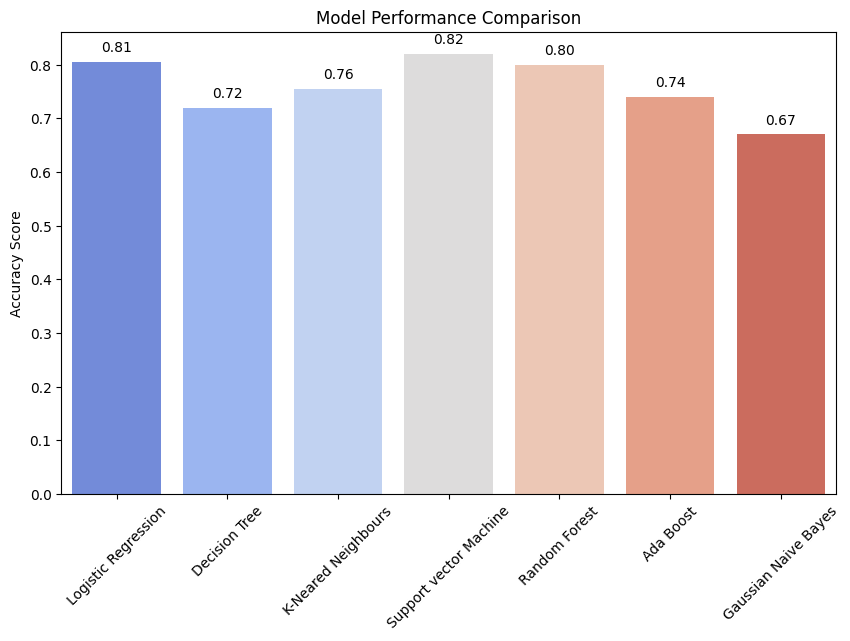

In [18]:
# Visualize the accuracy of all models
import seaborn as sns
plt.figure(figsize=(10, 6))
model_names = list(results.keys())
model_accuracies = list(results.values())
ax=sns.barplot(x=model_names, y=model_accuracies, palette="coolwarm")
plt.title('Model Performance Comparison')
plt.ylabel('Accuracy Score')
plt.xticks(rotation=45)

# Add value labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()
